<font size = 5> tensor是tensorflow中常用的一个数据类型，可以和ndarray相互转化

In [2]:
import tensorflow as tf
import numpy as np

<font size = 5> 生成常量张量

In [3]:
x = tf.constant([[2,3],[3,4]])

In [4]:
x

<tf.Tensor: id=0, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [3, 4]])>

In [5]:
x.numpy()

array([[2, 3],
       [3, 4]])

<font size = 5> 生成全一or全零张量

In [6]:
x = tf.ones(shape=(2,2))
y = tf.zeros(shape=(3,3))

In [7]:
x

<tf.Tensor: id=3, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [8]:
y

<tf.Tensor: id=6, shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

<font size = 5> 生成随机张量

In [9]:
tf.random.normal(shape=(2,2),mean=0,stddev=1)#正态分布

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[ 0.31334987, -0.16966459],
       [-1.0763396 , -0.18775356]], dtype=float32)>

In [10]:
tf.random.uniform(shape=(4,4),minval=1,maxval=10,dtype=tf.int32)#整数均匀分布

<tf.Tensor: id=16, shape=(4, 4), dtype=int32, numpy=
array([[6, 5, 1, 1],
       [5, 6, 1, 2],
       [4, 9, 1, 4],
       [4, 5, 7, 7]])>

<font size = 3> 变量是一种特别的张量，用来存储可变数值，需要用一些值来初始化

In [12]:
initial_value = tf.random.normal(shape = (2,2))
a = tf.Variable(initial_value)

In [13]:
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.33413503, -3.0974483 ],
       [ 0.7076105 ,  0.00846839]], dtype=float32)>

In [15]:
new_value = tf.random.normal(shape = (2,2))
a.assign(new_value)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-0.48524192, -0.7002488 ],
       [ 1.4342151 , -0.12872727]], dtype=float32)>

In [16]:
a.assign_add(new_value)#加上一个tensor

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-0.97048384, -1.4004976 ],
       [ 2.8684301 , -0.25745454]], dtype=float32)>

In [17]:
a.assign_sub(new_value)#减去一个tensor

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-0.48524192, -0.7002488 ],
       [ 1.4342151 , -0.12872727]], dtype=float32)>

<font size = 5> tensor运算

In [18]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

In [19]:
c = a + b

In [20]:
c

<tf.Tensor: id=64, shape=(2, 2), dtype=float32, numpy=
array([[-1.7288903, -1.7128992],
       [ 0.9496783, -2.293104 ]], dtype=float32)>

In [21]:
a

<tf.Tensor: id=57, shape=(2, 2), dtype=float32, numpy=
array([[-0.48739365, -0.47365808],
       [ 1.2628326 , -0.7737214 ]], dtype=float32)>

In [22]:
b

<tf.Tensor: id=63, shape=(2, 2), dtype=float32, numpy=
array([[-1.2414967, -1.2392411],
       [-0.3131543, -1.5193826]], dtype=float32)>

In [23]:
d = tf.square(c)

In [24]:
d

<tf.Tensor: id=65, shape=(2, 2), dtype=float32, numpy=
array([[2.9890616 , 2.9340236 ],
       [0.90188885, 5.2583256 ]], dtype=float32)>

<font size = 3> 通过低级API可以计算任何变量的梯度

In [25]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))
with tf.GradientTape() as tape:
    tape.watch(a)
    c = tf.sqrt(tf.square(a)+tf.square(b))
    dc_da =tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.06553004 -0.79404956]
 [ 0.10388478  0.7337015 ]], shape=(2, 2), dtype=float32)


In [26]:
#对于variable(变量)，会自动求梯度
a = tf.Variable(a)

In [28]:
with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a)+tf.square(b))
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.06553004 -0.79404956]
 [ 0.10388478  0.7337015 ]], shape=(2, 2), dtype=float32)


<font size = 5> 使用低级API进行线性回归

In [30]:
input_dim = 2 
output_dim = 1
learning_rate = 0.01
w = tf.Variable(tf.random.normal(shape=(input_dim,output_dim)))
b = tf.Variable(tf.random.normal(shape = (output_dim,)))

In [54]:
features.shape

(20000, 2)

In [55]:
w.shape

TensorShape([2, 1])

In [56]:
b.shape

TensorShape([1])

In [57]:
def compute_predictions(features):
    return tf.matmul(features,w) + b
def compute_loss(labels,predictions):
    return tf.reduce_mean(tf.square(labels-predictions))

def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y,predictions)
        dloss_w,dloss_b = tape.gradient(loss,[w,b])
    w.assign_sub(learning_rate*dloss_w)
    b.assign_sub(learning_rate*dloss_b)
    return loss

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [33]:
num_samples = 10000

negetive_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size=num_samples)

In [35]:
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size=num_samples)
features = np.vstack((negetive_samples,positive_samples)).astype(np.float32)

In [36]:
labels = np.vstack((np.zeros((num_samples,1),dtype=np.float32),np.ones((num_samples,1),dtype=np.float32)))

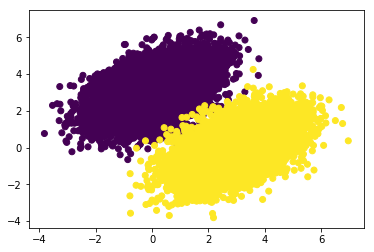

In [38]:
plt.scatter(features[:,0],features[:,1],c=labels[:,0])
plt.show()

In [39]:
indices = np.random.permutation(len(features))

In [40]:
features = features[indices]

In [41]:
labels = labels[indices]

In [42]:
dataset = tf.data.Dataset.from_tensor_slices((features,labels))

In [43]:
dataset = dataset.shuffle(buffer_size=1024).batch(256)

In [52]:
dataset

<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float32, tf.float32)>

In [58]:
for epoch in range(10):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
        
    print("Epoch%d: last batch loss = %.4f"%(epoch,float(loss)))

Epoch0: last batch loss = 0.2507
Epoch1: last batch loss = 0.1776
Epoch2: last batch loss = 0.0994
Epoch3: last batch loss = 0.0505
Epoch4: last batch loss = 0.0394
Epoch5: last batch loss = 0.0345
Epoch6: last batch loss = 0.0304
Epoch7: last batch loss = 0.0211
Epoch8: last batch loss = 0.0305
Epoch9: last batch loss = 0.0221


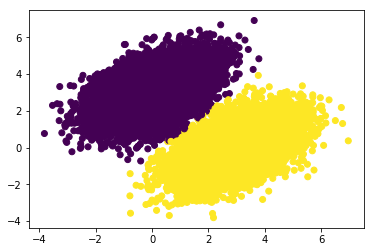

In [64]:
predictions = compute_predictions(features)
plt.scatter(features[:,0],features[:,1],c=predictions[:,0]>0.5)

In [65]:
import time

In [67]:
t0 = time.time()
for epoch in range(20):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time() - t0

In [68]:
t_end

2.999051809310913

In [69]:
t_end/20

0.14995259046554565

In [70]:
@tf.function
def train_on_batch(x,y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y,predictions)
        dloss_w,dloss_b = tape.gradient(loss,[w,b])
    w.assign_sub(learning_rate*dloss_w)
    b.assign_sub(learning_rate*dloss_b)
    return loss

In [71]:
t0 = time.time()
for epoch in range(20):
    for step,(x,y) in enumerate(dataset):
        loss = train_on_batch(x,y)
t_end = time.time() - t0

In [72]:
t_end

1.950789451599121

In [73]:
t_end/20

0.09753947257995606